# SMS Spam Detection - Model Training

This notebook covers the model training and evaluation process for the SMS Spam Detection project.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Helper Functions

In [2]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    # Adding labels
    label_font = {'fontsize': 12, 'fontweight': 'bold'}
    plt.text(-0.4, -0.4, 'Ham', ha='right', va='center', **label_font)
    plt.text(-0.4, 1.4, 'Spam', ha='right', va='center', **label_font)
    plt.text(-0.4, 2.3, 'Actual', ha='right', va='center', rotation=90, **label_font)
    plt.text(0.5, 2.3, 'Ham', ha='center', va='bottom', **label_font)
    plt.text(1.5, 2.3, 'Spam', ha='center', va='bottom', **label_font)
    plt.text(2.3, 2.3, 'Predicted', ha='center', va='bottom', **label_font)
    
    # Improve visibility of digits
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j+0.5, i+0.5, str(cm[i, j]),
                     ha="center", va="center",
                     color="white" if cm[i, j] > cm.max() / 2 else "black")
    
    plt.tight_layout()
    plt.show()

## 1. Data Loading and Preprocessing

In [3]:
# Load the train and test data
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Handle NaN values
train_data['text'] = train_data['text'].fillna('')
test_data['text'] = test_data['text'].fillna('')

X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4179,)
Test set shape: (1393,)


## 2. Text Vectorization

In [4]:
# Create TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF training set shape:", X_train_tfidf.shape)
print("TF-IDF test set shape:", X_test_tfidf.shape)

TF-IDF training set shape: (4179, 5000)
TF-IDF test set shape: (1393, 5000)


## 3. Model Training and Evaluation


Naive Bayes:
Accuracy: 0.9648
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1202
        spam       1.00      0.74      0.85       191

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.92      1393
weighted avg       0.97      0.96      0.96      1393

Confusion Matrix:
[[1202    0]
 [  49  142]]


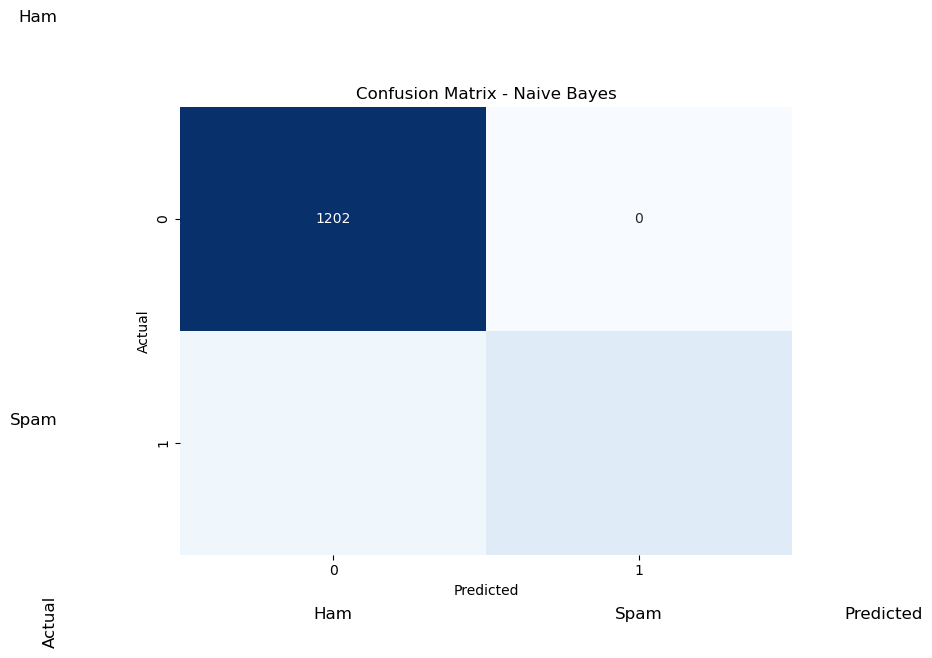


Logistic Regression:
Accuracy: 0.9497
Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1202
        spam       0.97      0.65      0.78       191

    accuracy                           0.95      1393
   macro avg       0.96      0.83      0.88      1393
weighted avg       0.95      0.95      0.95      1393

Confusion Matrix:
[[1198    4]
 [  66  125]]


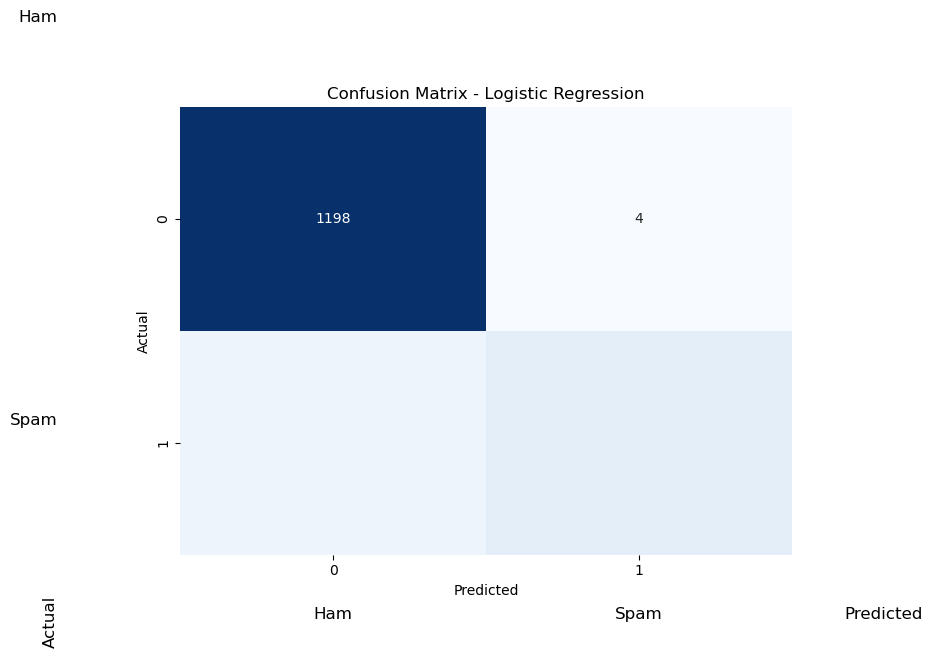


Random Forest:
Accuracy: 0.9742
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1202
        spam       1.00      0.81      0.90       191

    accuracy                           0.97      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Confusion Matrix:
[[1202    0]
 [  36  155]]


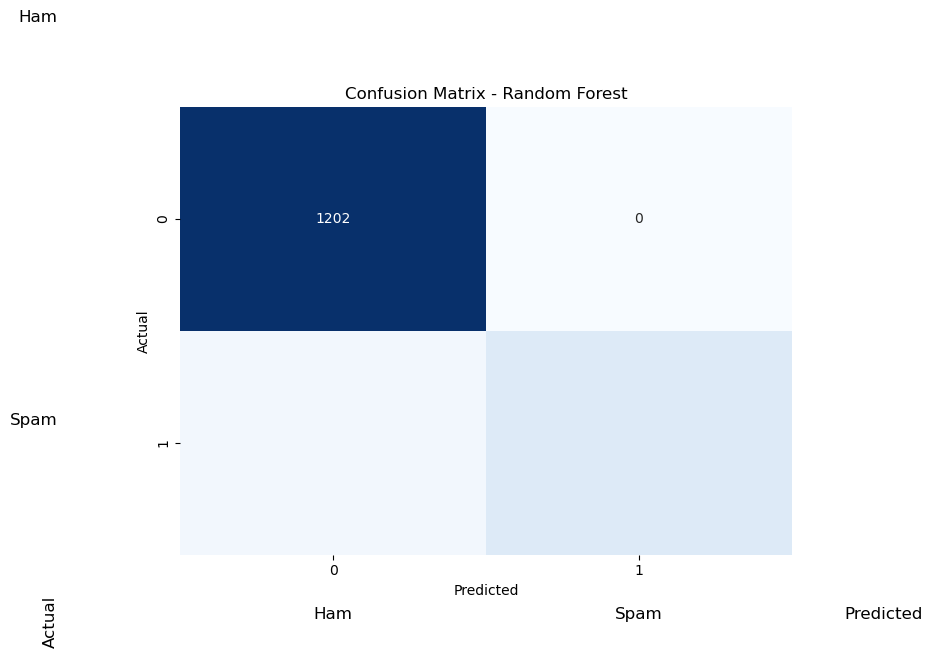


SVM:
Accuracy: 0.9734
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1202
        spam       0.99      0.82      0.89       191

    accuracy                           0.97      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.97      0.97      0.97      1393

Confusion Matrix:
[[1200    2]
 [  35  156]]


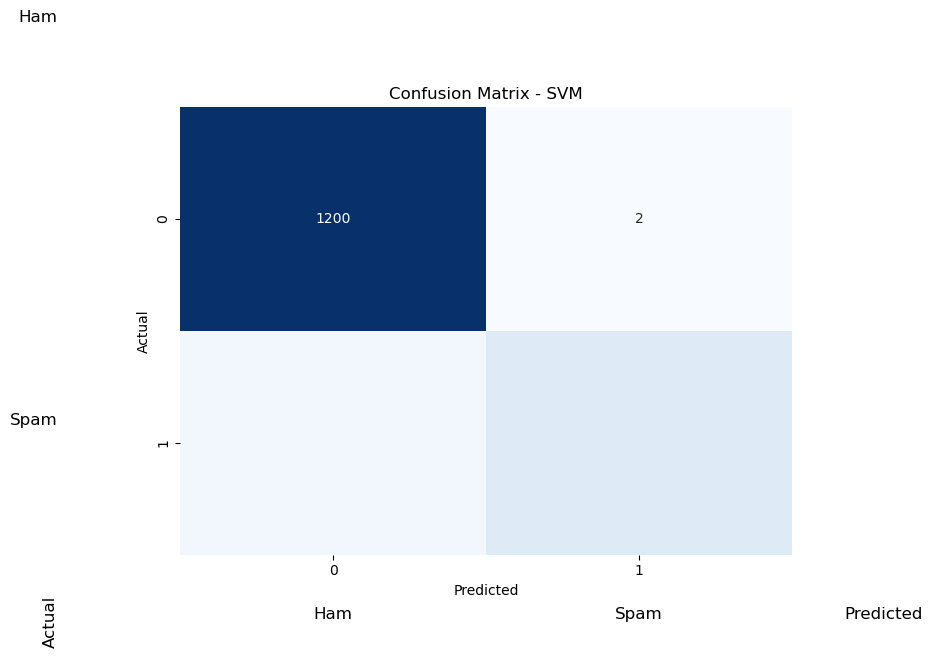

In [5]:
# Model optimization process
models = [
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42))
]

results = []
best_accuracy = 0
best_model = None
best_model_name = ''

for name, model in models:
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plot_confusion_matrix(cm, name)
    
    # Keep track of the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

# Print overall model performance
print("\nOverall Model Performance:")
for name, accuracy in results:
    print(f"{name}: {accuracy:.4f}")

# Save the best model
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
print(f"\nBest Model: {best_model_name}")
print(f"Best Model Accuracy: {best_accuracy:.4f}")
print("Best model and vectorizer saved successfully!")

## 4. Model Comparison

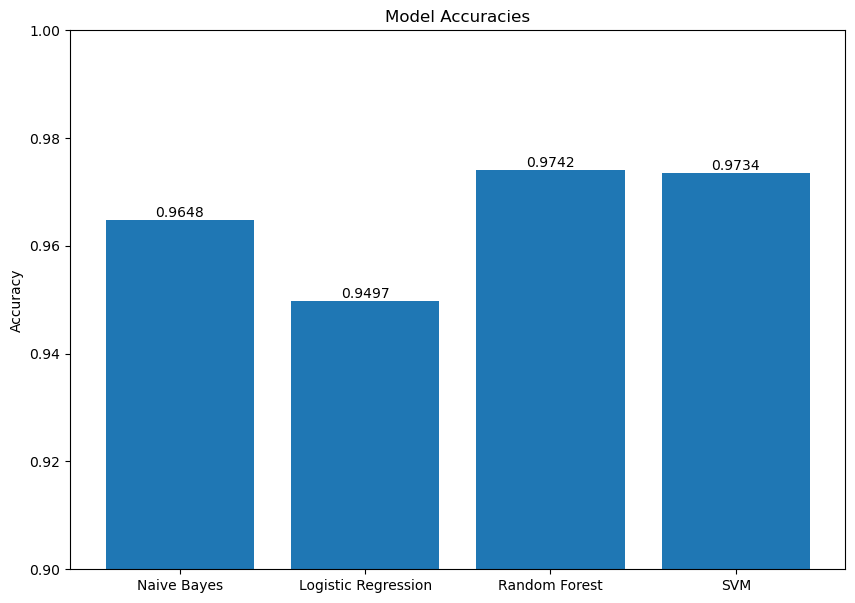


Results saved to model_results.csv


,Model,Accuracy
0,Naive Bayes,0.964824
1,Logistic Regression,0.949749
2,Random Forest,0.974156
3,SVM,0.973439


In [6]:
# Visualize model accuracies
plt.figure(figsize=(10,7))
names = [result[0] for result in results]
accuracies = [result[1] for result in results]
plt.bar(names, accuracies)
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Set y-axis to start from 0.9 for better visualization of differences
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Save results to CSV
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
results_df.to_csv('model_results.csv', index=False)
print("\nResults saved to model_results.csv")
display(results_df)

## 5. Best Model Selection and Final Evaluation

In [7]:
# Final evaluation on test set
y_pred = best_model.predict(X_test_tfidf)
print("\nFinal Evaluation on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm, f'Best Model ({best_model_name})')

NameError: name 'best_model' is not defined